<a href="https://colab.research.google.com/github/samsoe/mpg_biomass/blob/master/Visualizations_pellet_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

bigrquery [Documentation](https://www.rdocumentation.org/packages/bigrquery/versions/1.2.0)
* billing [documentation](https://github.com/r-dbi/bigrquery/issues/366)

This is an R Notebook.  An API key needs to be generated externally and uploaded for reasons.

# Gather Tools

In [2]:
# bigquery api access
install.packages("bigrquery")
install.packages("httpuv")
install.packages("googleAuthR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘gargle’, ‘rapidjsonr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(bigrquery)
library(httpuv)
library(tidyr)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Database Connection

In [0]:
# BigQuery API Key
bq_auth(path = "/content/mpg-data-warehouse-34434e1a9914.json")

In [0]:
Sys.setenv(BIGQUERY_TEST_PROJECT = "mpg-data-warehouse")

In [0]:
billing <- bq_test_project()

# Deer, Elk, Horse

## Query Database

In [0]:
sql <- "SELECT 
           *
        FROM 
          `mpg-data-warehouse.vegetation_biomass.pellet_count`"

In [0]:
tb <- bq_project_query(billing, sql)

In [0]:
pellet_count = bq_table_download(tb)

## Format

In [0]:
# convert to data frame
pellet_count <- as.data.frame(pellet_count)

In [0]:
pellet_count$year <- as.factor(pellet_count$year)

In [0]:
pellet_count$season <- as.factor(pellet_count$season)

In [0]:
# wide to long
pellet_count <- gather(pellet_count, ungulate, count, deer, elk, horse)

In [33]:
head(pellet_count)

,grid_point,year,season,ungulate,count
,<int>,<fct>,<fct>,<chr>,<dbl>
1,3,2011,fall,deer,0
2,4,2011,fall,deer,0
3,10,2011,fall,deer,0
4,11,2011,fall,deer,0
5,21,2011,fall,deer,0
6,22,2011,fall,deer,0


## Display

In [0]:
# make plots wider
options(repr.plot.width=15, repr.plot.height=8)

### Spring

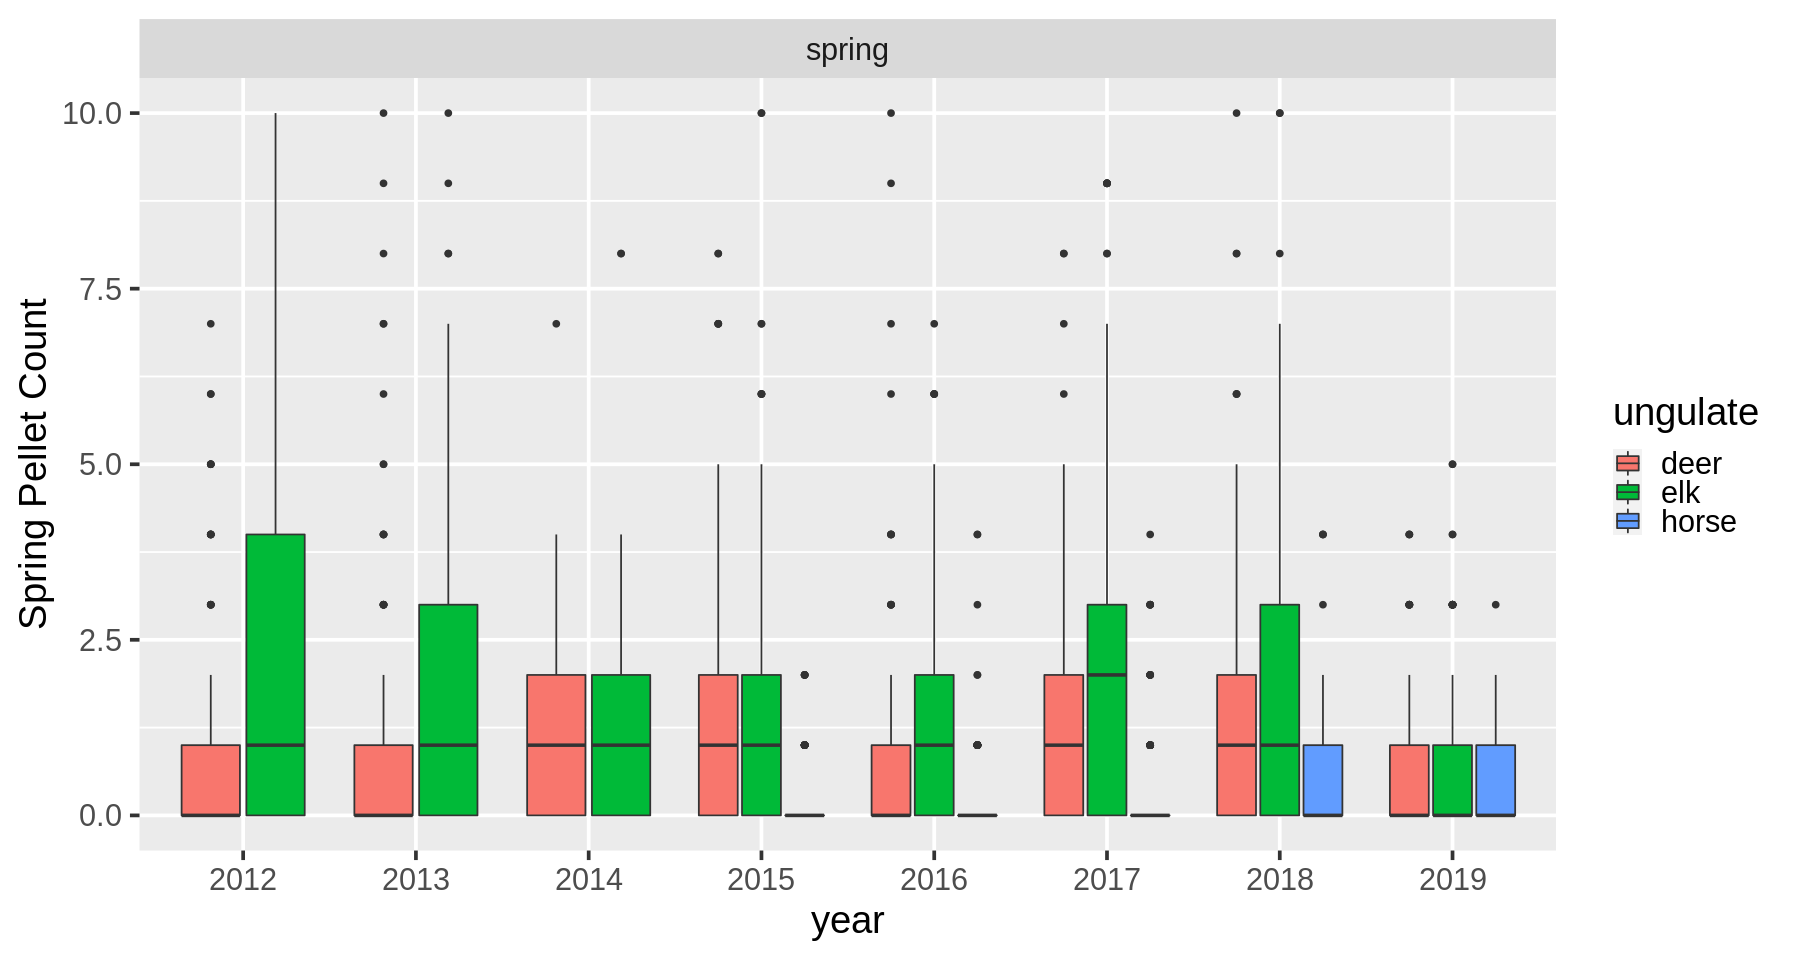

In [39]:
p <- ggplot(data = filter(pellet_count, season == "spring")) +
  geom_boxplot(aes(x=year, y=count, fill=ungulate), na.rm=TRUE)

p +
  scale_y_continuous(name="Spring Pellet Count", limits=c(0,10)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)

### Fall

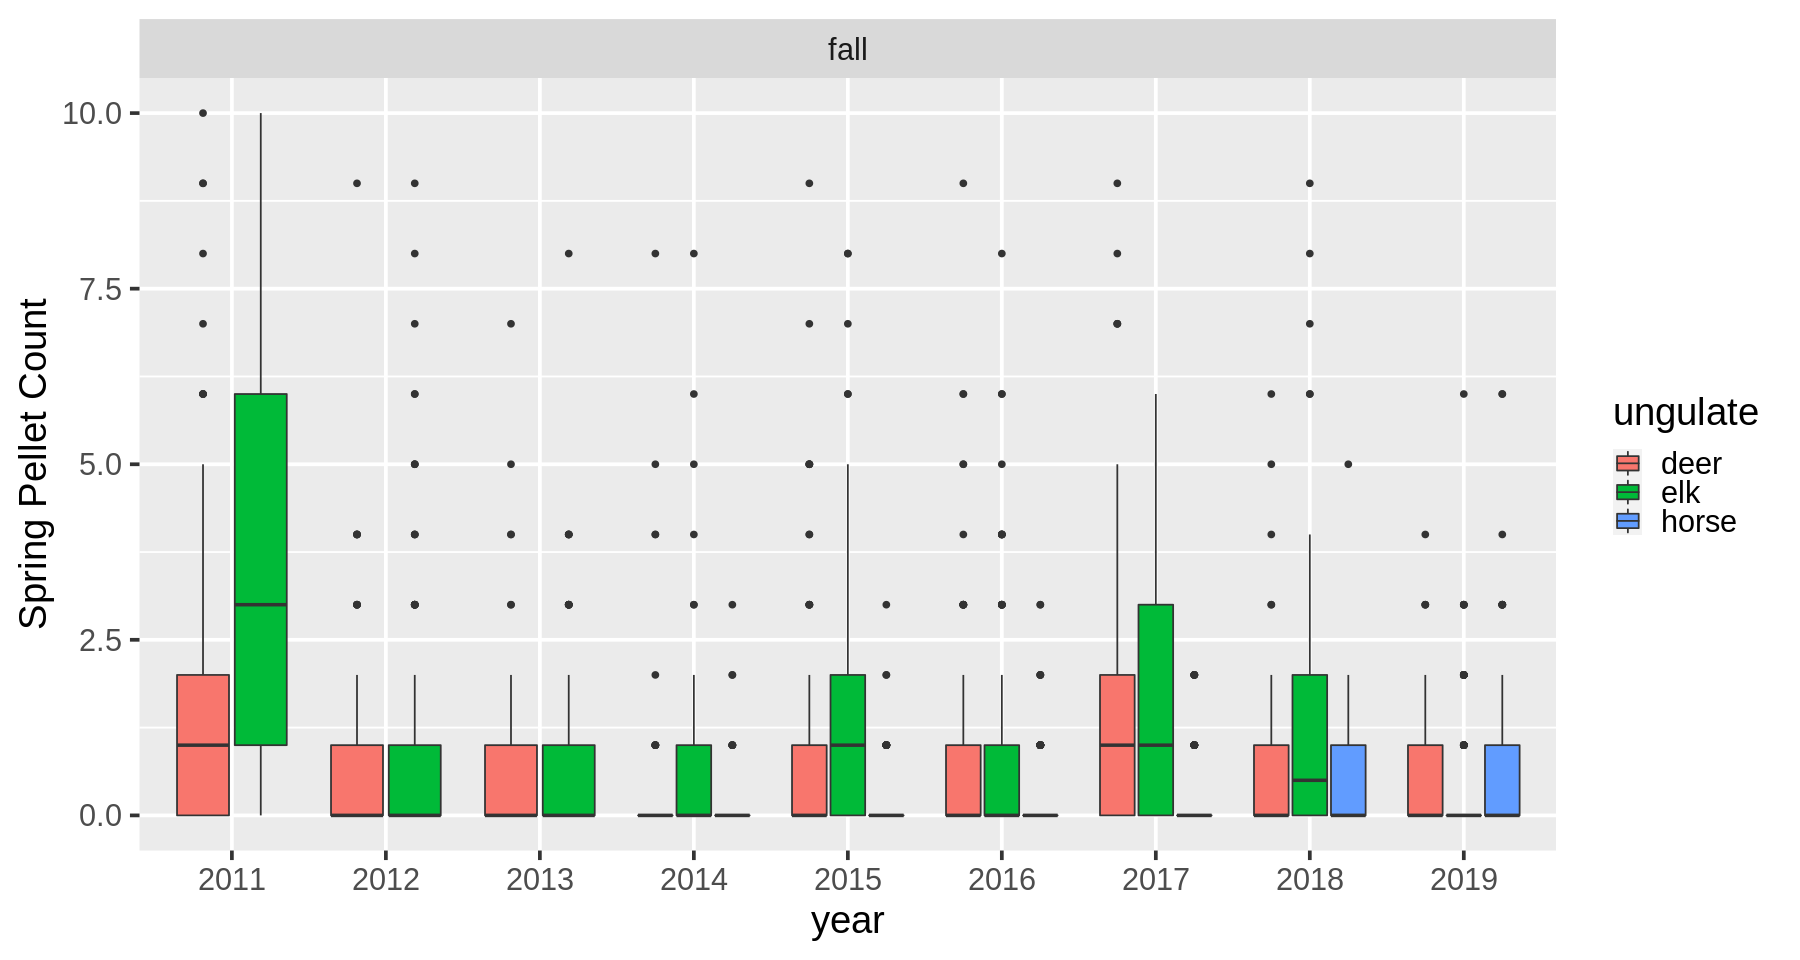

In [48]:
p <- ggplot(data = filter(pellet_count, season == "fall")) +
  geom_boxplot(aes(x=year, y=count, fill=ungulate), na.rm=TRUE)

p +
  scale_y_continuous(name="Spring Pellet Count", limits=c(0,10)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)

# Combined

## Query Database

In [0]:
sql <- "SELECT
          grid_point,
          year,
          season,
          (deer + elk + horse) AS combined
        FROM
          `mpg-data-warehouse.vegetation_biomass.pellet_count`"

In [0]:
tb <- bq_project_query(billing, sql)

In [0]:
pellet_combined = bq_table_download(tb)

## Format

In [0]:
# convert to data frame
pellet_combined <- as.data.frame(pellet_combined)

In [0]:
pellet_combined$year <- as.factor(pellet_combined$year)

In [0]:
pellet_combined$season <- as.factor(pellet_combined$season)

In [47]:
head(pellet_combined)

,grid_point,year,season,combined
,<int>,<fct>,<fct>,<dbl>
1,3,2011,fall,NA
2,4,2011,fall,NA
3,10,2011,fall,NA
4,11,2011,fall,NA
5,21,2011,fall,NA
6,22,2011,fall,NA


## Display

### Spring

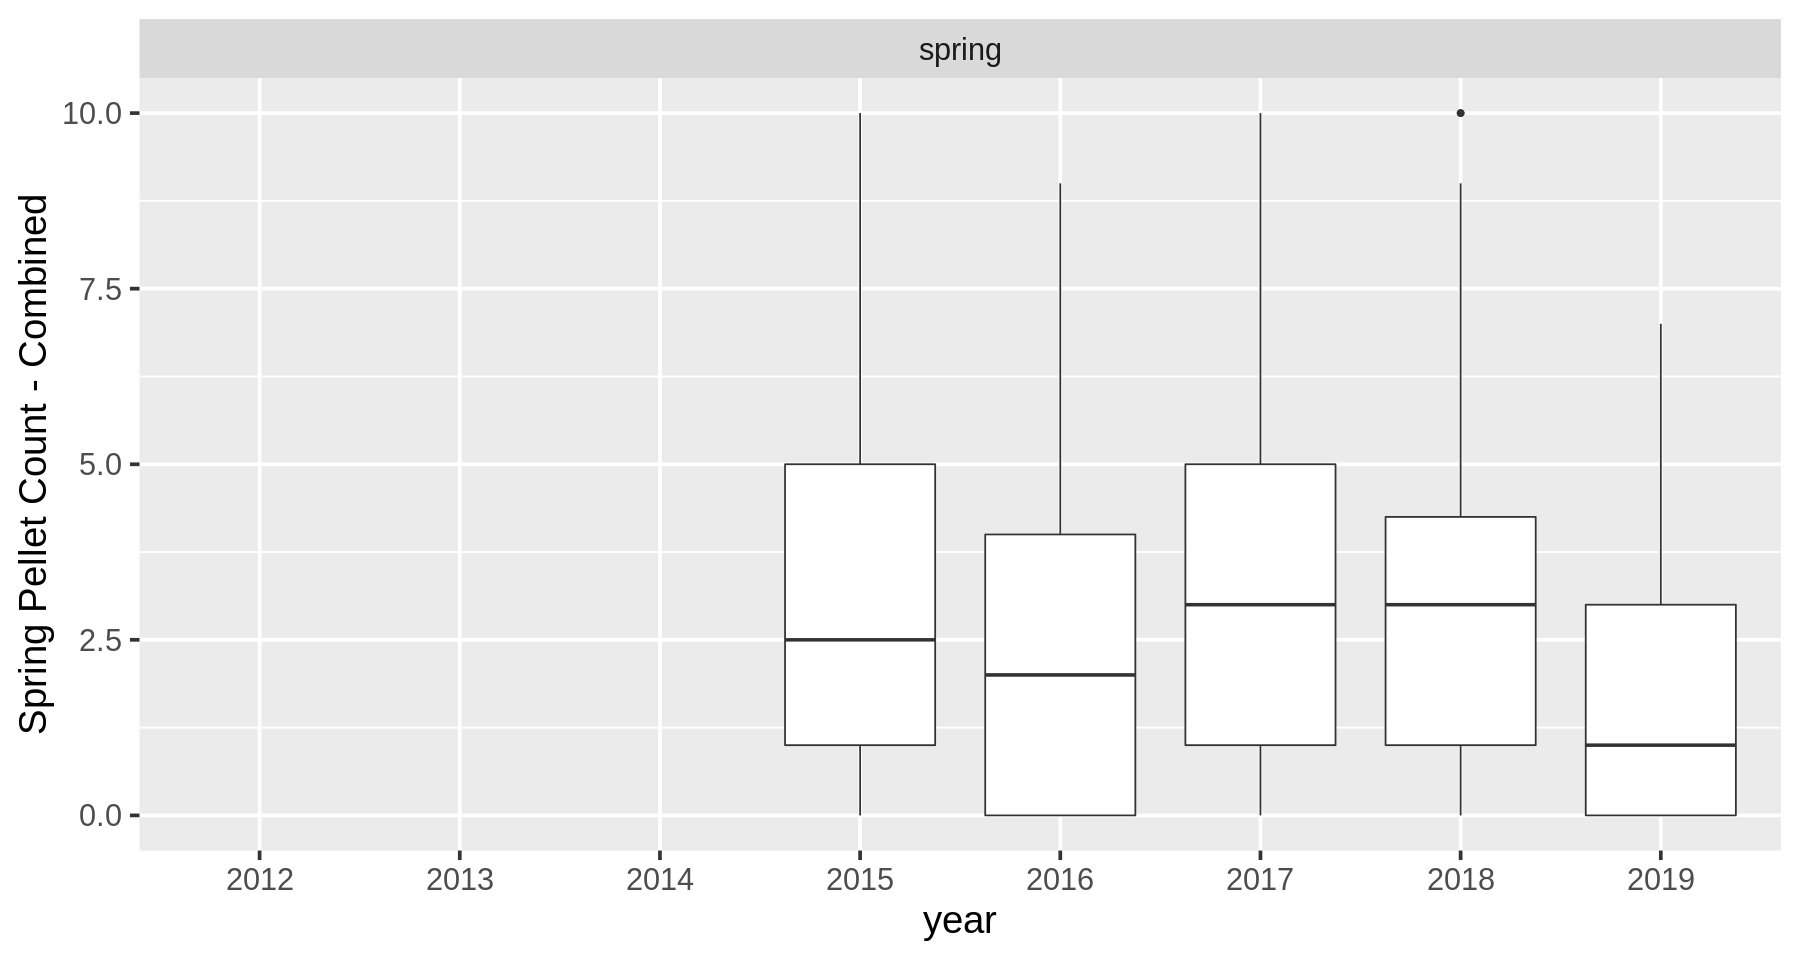

In [49]:
p <- ggplot(data = filter(pellet_combined, season == "spring")) +
  geom_boxplot(aes(x=year, y=combined), na.rm=TRUE)

p +
  scale_y_continuous(name="Spring Pellet Count - Combined", limits=c(0,10)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)

### Fall

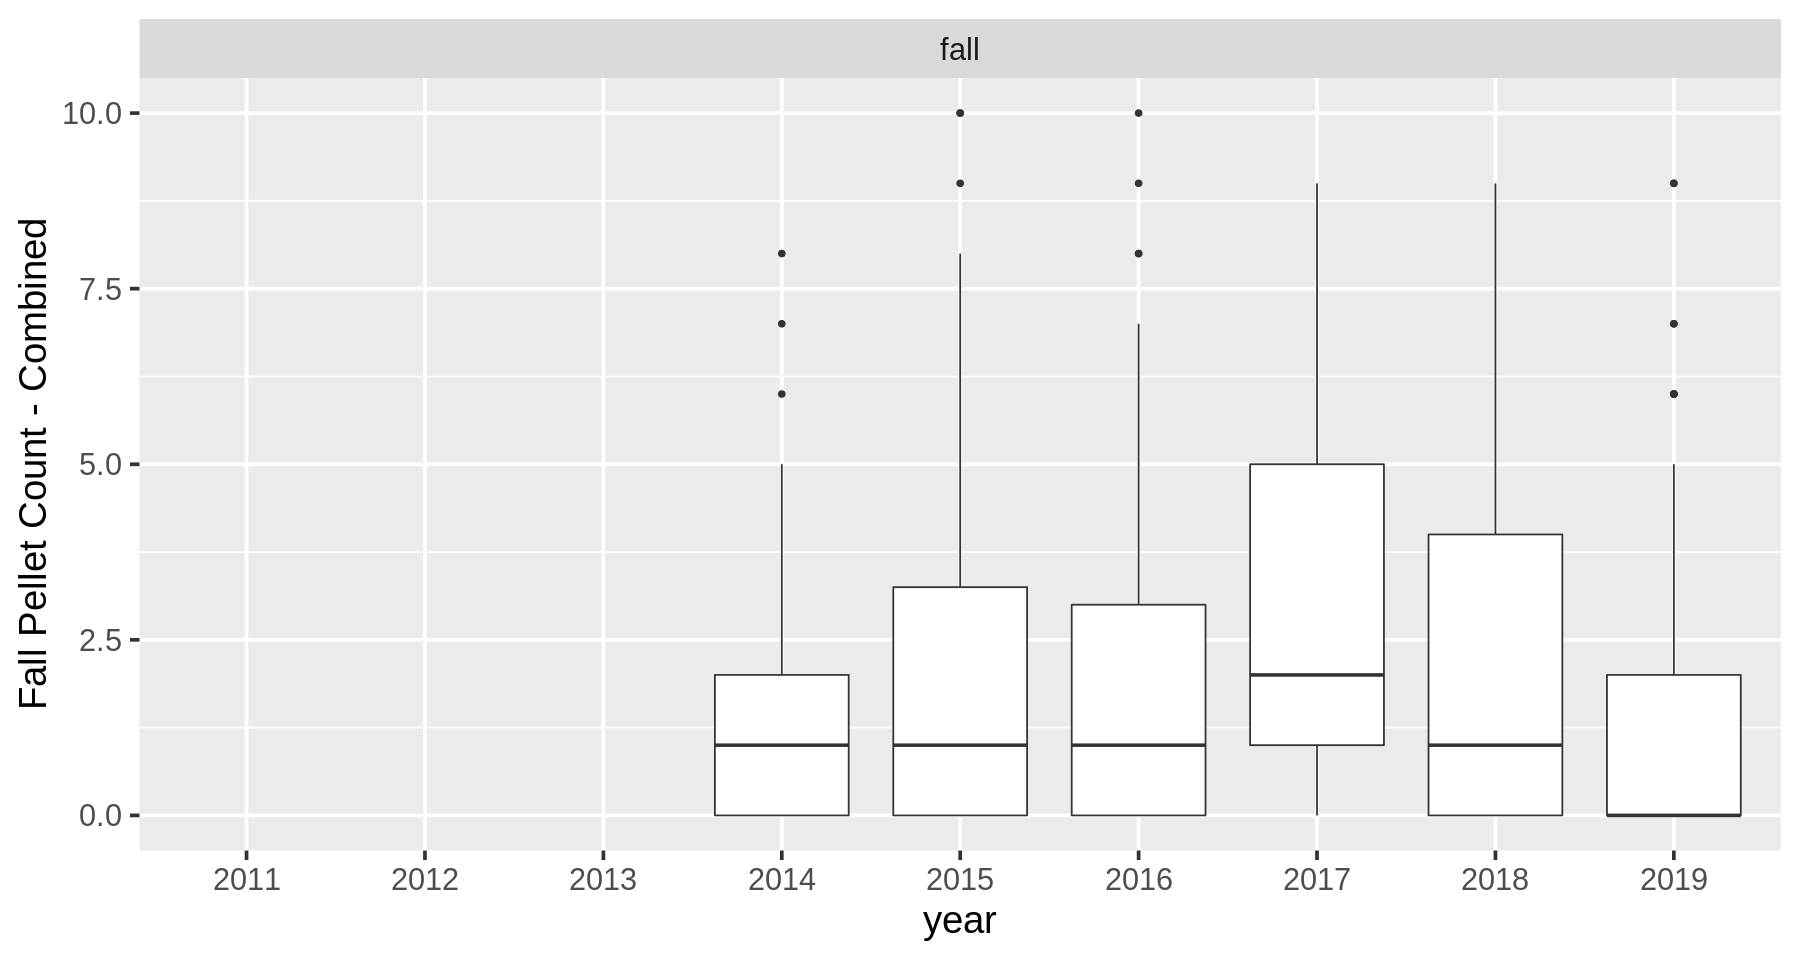

In [51]:
p <- ggplot(data = filter(pellet_combined, season == "fall")) +
  geom_boxplot(aes(x=year, y=combined), na.rm=TRUE)

p +
  scale_y_continuous(name="Fall Pellet Count - Combined", limits=c(0,10)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)